In [1]:
import networkx as nx
import pandas as pd

import utils

In [2]:
import pickle
with open('graph_objects/scigrid.pkl', 'rb') as f:
    G = pickle.load(f)

G_project_thesis = nx.read_graphml('graph_objects/entsog')

In [3]:
n_benchmarks = 50

---

# Project thesis N-k algorithm

## Entsog

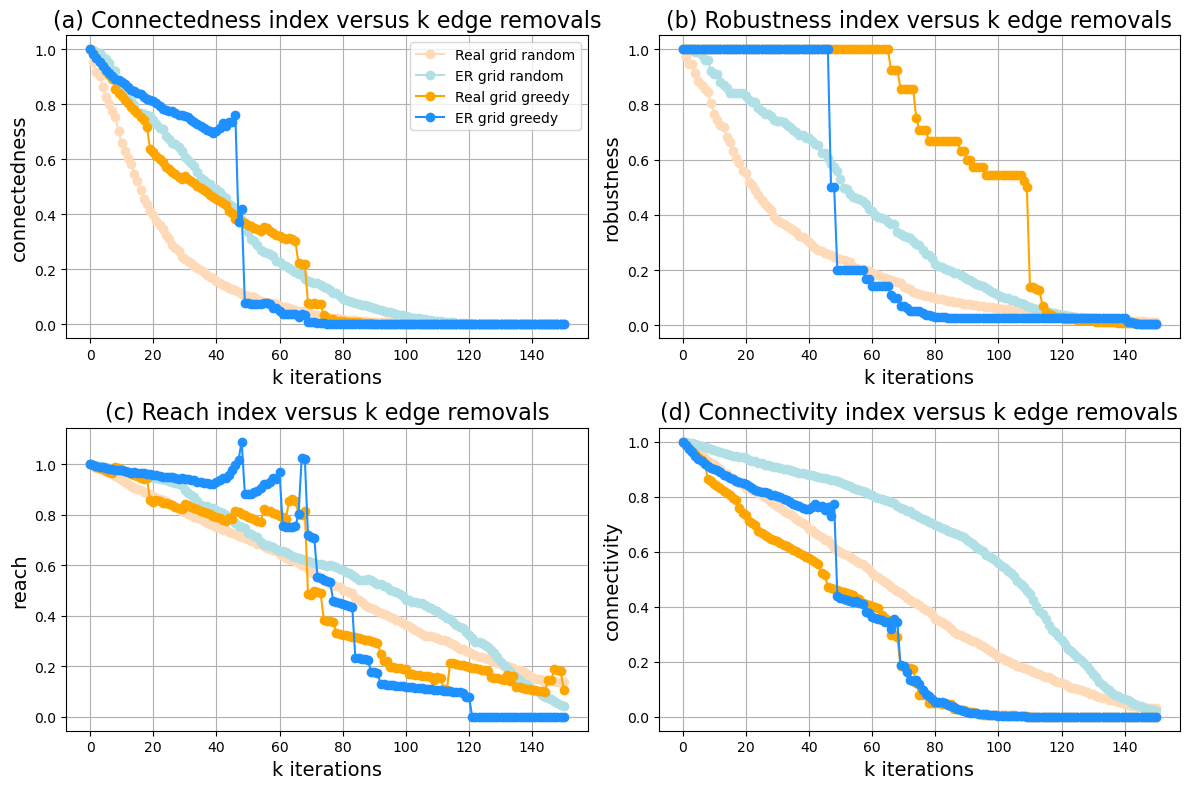

In [4]:
# random_edge_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=150, heuristic='random', remove='edge')
# greedy_edge_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=150, heuristic='greedy', remove='edge')

# random_edge_removal_project_thesis_df.to_pickle('results/project_thesis_random_edge_removal_project_thesis.pkl')
# greedy_edge_removal_project_thesis_df.to_pickle('results/project_thesis_greedy_edge_removal_project_thesis.pkl')

random_edge_removal_project_thesis_df = pd.read_pickle('results/project_thesis_random_edge_removal_project_thesis.pkl')
greedy_edge_removal_project_thesis_df = pd.read_pickle('results/project_thesis_greedy_edge_removal_project_thesis.pkl')

titles = ['(a) Connectedness index versus k edge removals', '(b) Robustness index versus k edge removals', '(c) Reach index versus k edge removals', '(d) Connectivity index versus k edge removals']

utils.plot_connectedness_fourway([random_edge_removal_project_thesis_df, greedy_edge_removal_project_thesis_df], titles)

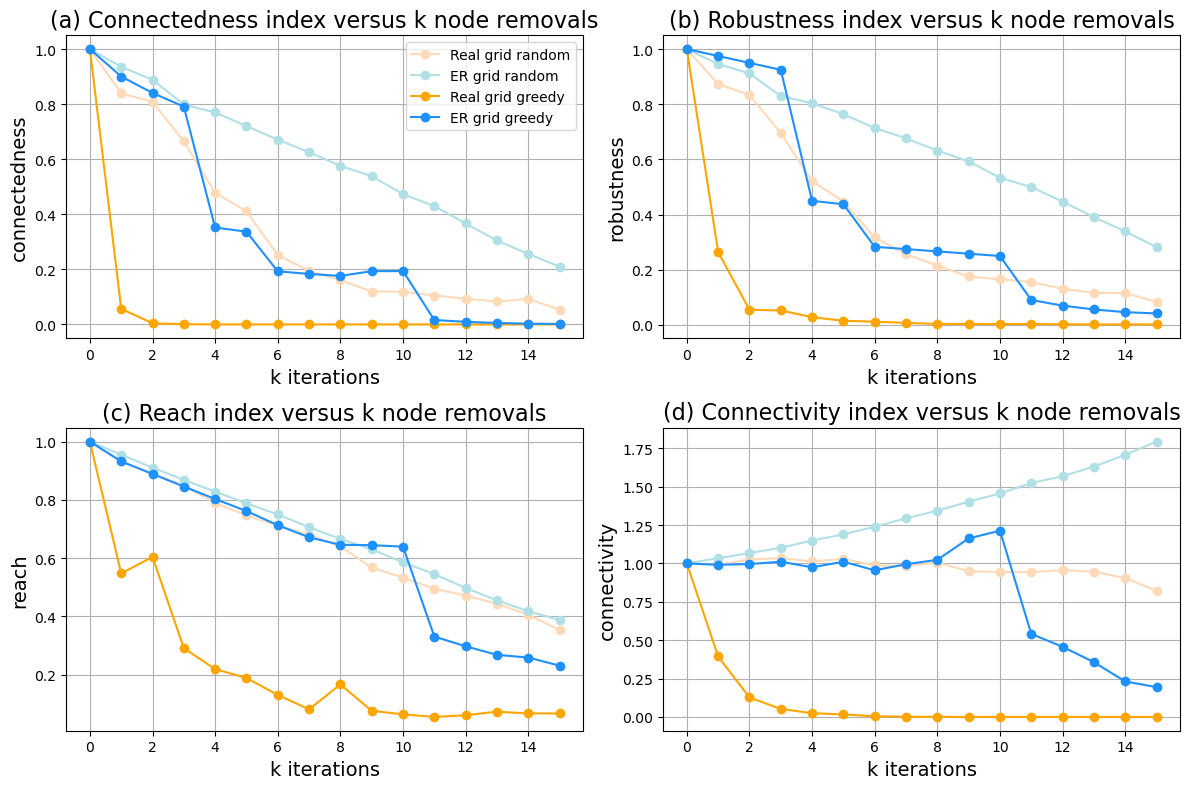

In [5]:

# random_node_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=15, heuristic='random', remove='node')
# greedy_node_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=15, heuristic='greedy', remove='node')

# random_node_removal_project_thesis_df.to_pickle('results/project_thesis_random_node_removal_project_thesis.pkl')
# greedy_node_removal_project_thesis_df.to_pickle('results/project_thesis_greedy_node_removal_project_thesis.pkl')

random_node_removal_project_thesis_df = pd.read_pickle('results/project_thesis_random_node_removal_project_thesis.pkl')
greedy_node_removal_project_thesis_df = pd.read_pickle('results/project_thesis_greedy_node_removal_project_thesis.pkl')

titles = ['(a) Connectedness index versus k node removals', '(b) Robustness index versus k node removals', '(c) Reach index versus k node removals', '(d) Connectivity index versus k node removals']

utils.plot_connectedness_fourway([random_node_removal_project_thesis_df, greedy_node_removal_project_thesis_df], titles)

## Scigrid

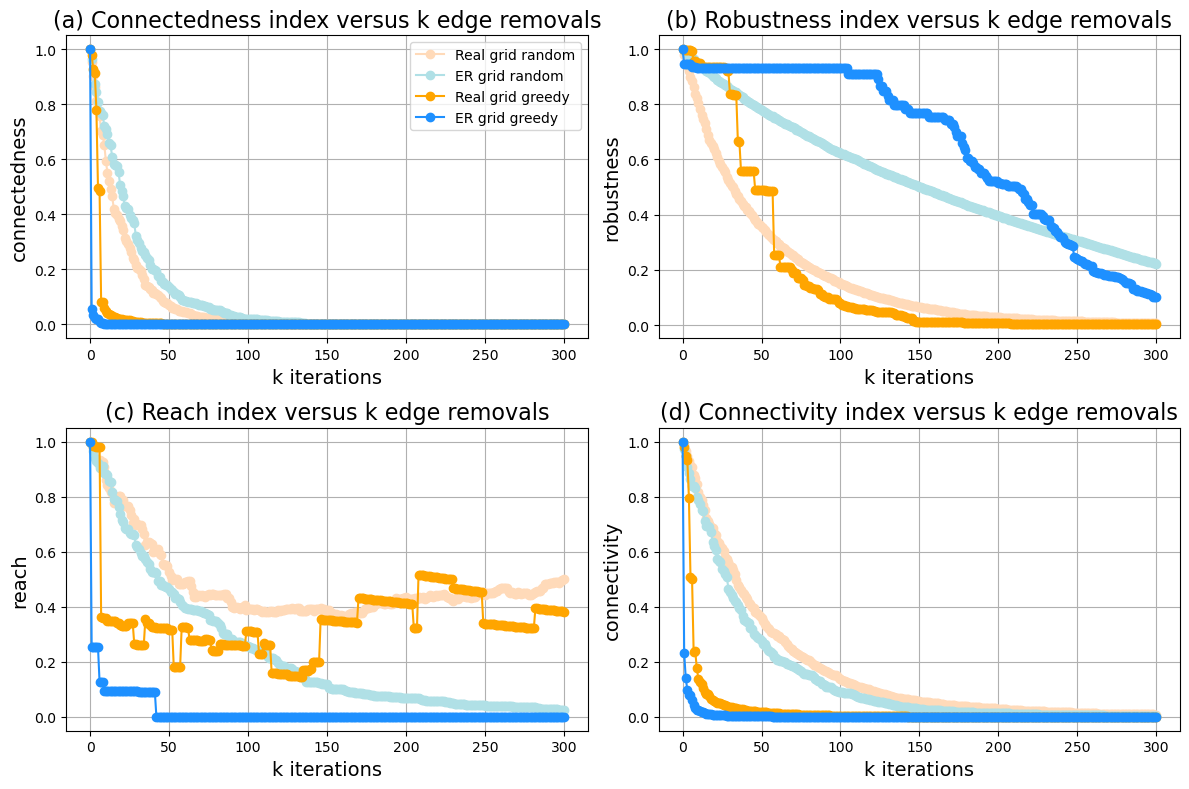

In [6]:
# random_edge_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='random', remove='edge')
# greedy_edge_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='greedy', remove='edge')

# random_edge_removal_scigrid_df.to_pickle('results/project_thesis_random_edge_removal_scigrid.pkl')
# greedy_edge_removal_scigrid_df.to_pickle('results/project_thesis_greedy_edge_removal_scigrid.pkl')

random_edge_removal_scigrid_df = pd.read_pickle('results/project_thesis_random_edge_removal_scigrid.pkl')
greedy_edge_removal_scigrid_df = pd.read_pickle('results/project_thesis_greedy_edge_removal_scigrid.pkl')

titles = ['(a) Connectedness index versus k edge removals', '(b) Robustness index versus k edge removals', '(c) Reach index versus k edge removals', '(d) Connectivity index versus k edge removals']

utils.plot_connectedness_fourway([random_edge_removal_scigrid_df, greedy_edge_removal_scigrid_df], titles)

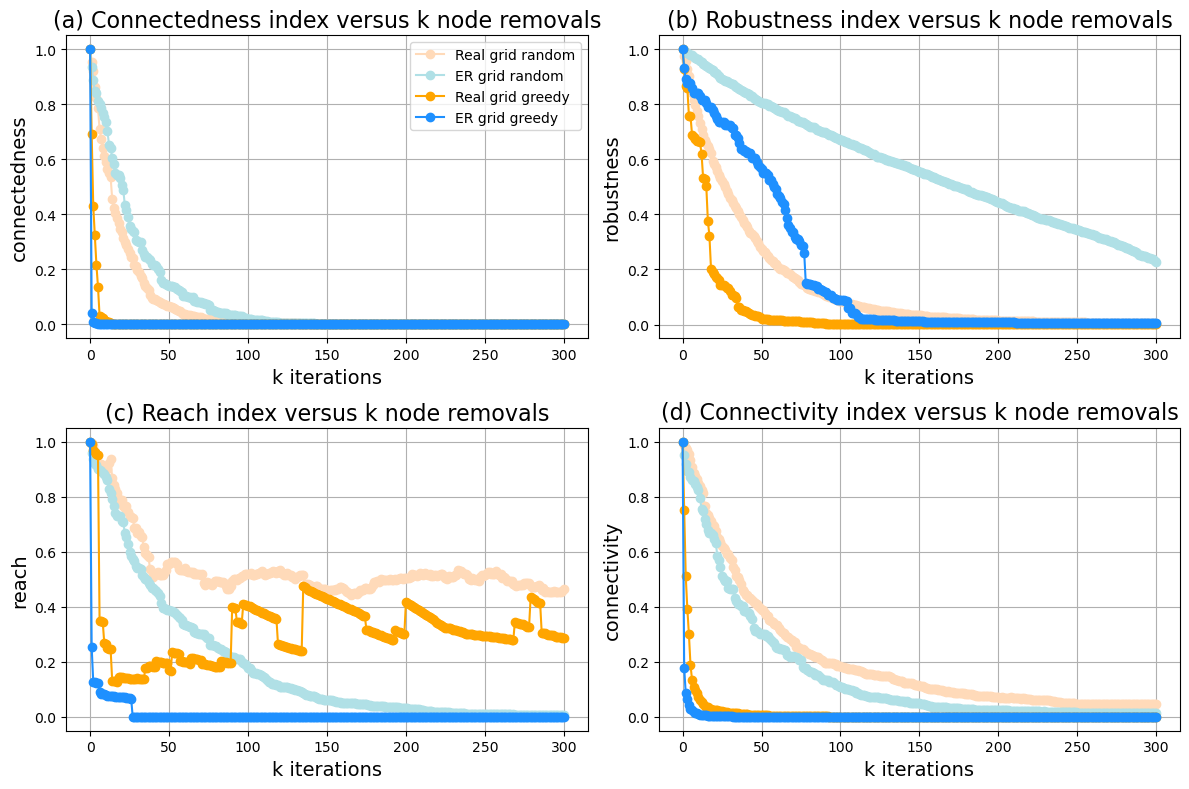

In [7]:

# random_node_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='random', remove='node')
# greedy_node_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='greedy', remove='node')

# random_node_removal_scigrid_df.to_pickle('results/project_thesis_random_node_removal_scigrid.pkl')
# greedy_node_removal_scigrid_df.to_pickle('results/project_thesis_greedy_node_removal_scigrid.pkl')

random_node_removal_scigrid_df = pd.read_pickle('results/project_thesis_random_node_removal_scigrid.pkl')
greedy_node_removal_scigrid_df = pd.read_pickle('results/project_thesis_greedy_node_removal_scigrid.pkl')

titles = ['(a) Connectedness index versus k node removals', '(b) Robustness index versus k node removals', '(c) Reach index versus k node removals', '(d) Connectivity index versus k node removals']

utils.plot_connectedness_fourway([random_node_removal_scigrid_df, greedy_node_removal_scigrid_df], titles)

---

In [8]:
# PROCESS DATAFRAMES
def process_dataframe(df, suffix):
    df = df.drop(df.filter(regex='_b$').columns, axis=1)
    df = df.rename(columns=lambda x: x + f'_{suffix}' if x != 'iteration' else x)
    return df

def concatenate_and_rename(df1, df2, suffix1, suffix2):
    result_df = pd.concat([df1, df2], axis=1)
    result_df.columns = ['iteration_' + suffix1 if i == 0 else 'iteration_' + suffix2 if i == 5 else col for i, col in enumerate(result_df.columns)]
    return result_df

random_edge_removal_scigrid_df = process_dataframe(random_edge_removal_scigrid_df, 'scigrid')
greedy_edge_removal_scigrid_df = process_dataframe(greedy_edge_removal_scigrid_df, 'scigrid')
random_edge_removal_project_thesis_df = process_dataframe(random_edge_removal_project_thesis_df, 'entsog')
greedy_edge_removal_project_thesis_df = process_dataframe(greedy_edge_removal_project_thesis_df, 'entsog')

random_node_removal_scigrid_df = process_dataframe(random_node_removal_scigrid_df, 'scigrid')
greedy_node_removal_scigrid_df = process_dataframe(greedy_node_removal_scigrid_df, 'scigrid')
random_node_removal_project_thesis_df = process_dataframe(random_node_removal_project_thesis_df, 'entsog')
greedy_node_removal_project_thesis_df = process_dataframe(greedy_node_removal_project_thesis_df, 'entsog')

random_node_removal_df = concatenate_and_rename(random_node_removal_scigrid_df, random_node_removal_project_thesis_df, 'scigrid', 'entsog')
greedy_node_removal_df = concatenate_and_rename(greedy_node_removal_scigrid_df, greedy_node_removal_project_thesis_df, 'scigrid', 'entsog')

random_edge_removal_df = concatenate_and_rename(random_edge_removal_scigrid_df, random_edge_removal_project_thesis_df, 'scigrid', 'entsog')
greedy_edge_removal_df = concatenate_and_rename(greedy_edge_removal_scigrid_df, greedy_edge_removal_project_thesis_df, 'scigrid', 'entsog')

random_node_removal_df.name = 'random_node_removal'
greedy_node_removal_df.name = 'greedy_node_removal'
random_edge_removal_df.name = 'random_edge_removal'
greedy_edge_removal_df.name = 'greedy_edge_removal'

---

# Comparison

## Edge

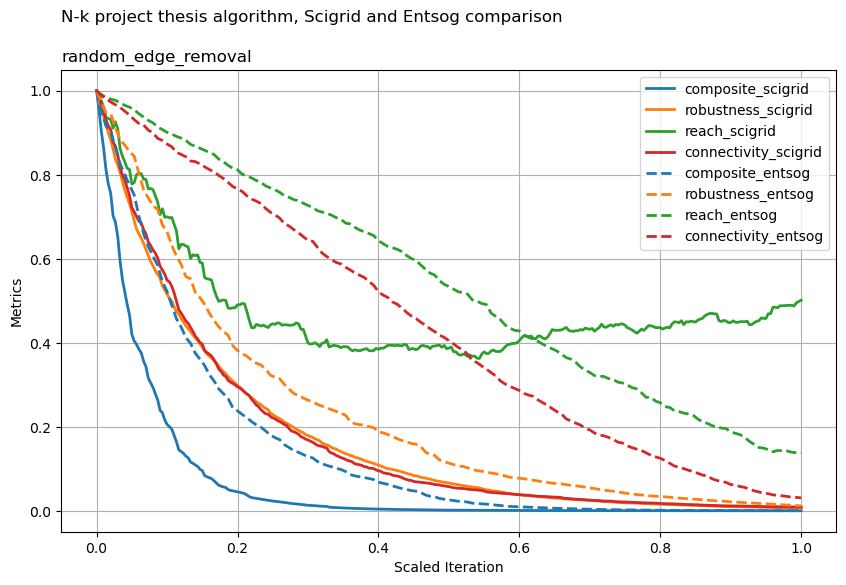

In [9]:
utils.compare_scigrid_entsog(random_edge_removal_df)

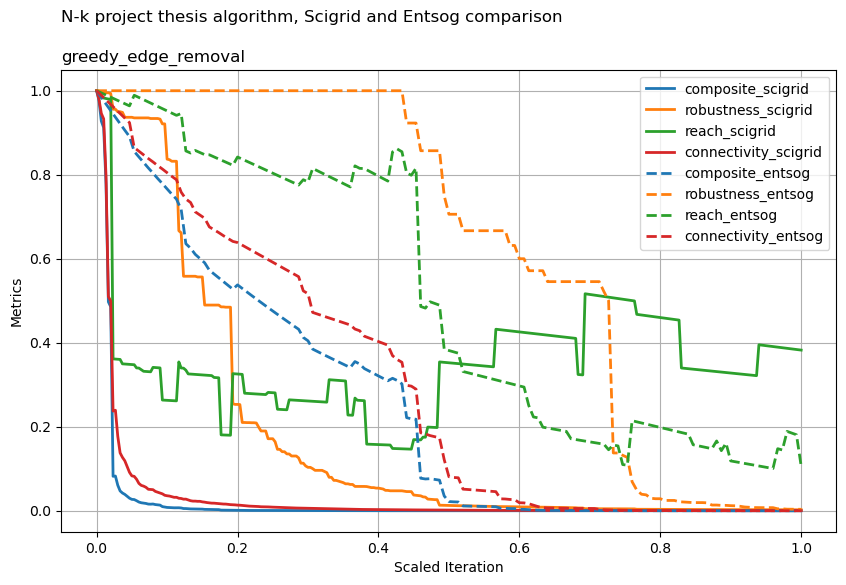

In [10]:
utils.compare_scigrid_entsog(greedy_edge_removal_df)


## Node

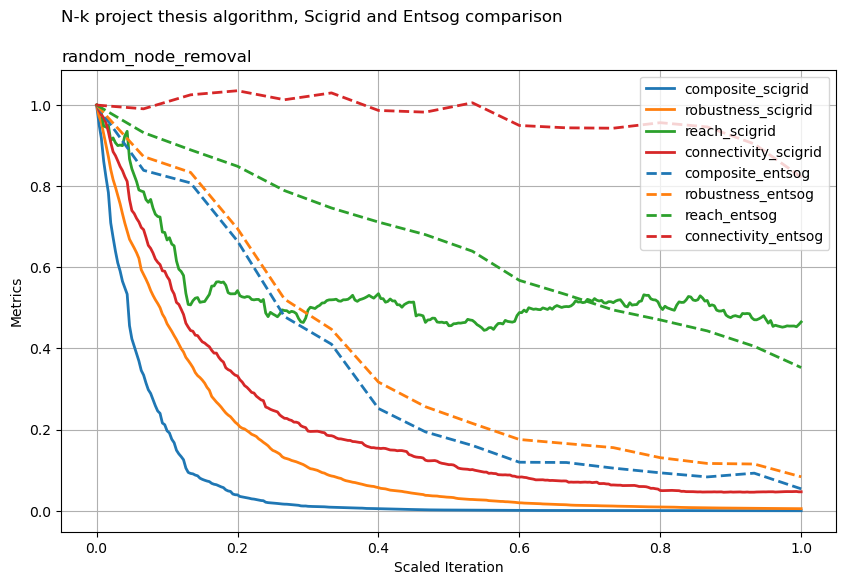

In [11]:
utils.compare_scigrid_entsog(random_node_removal_df)


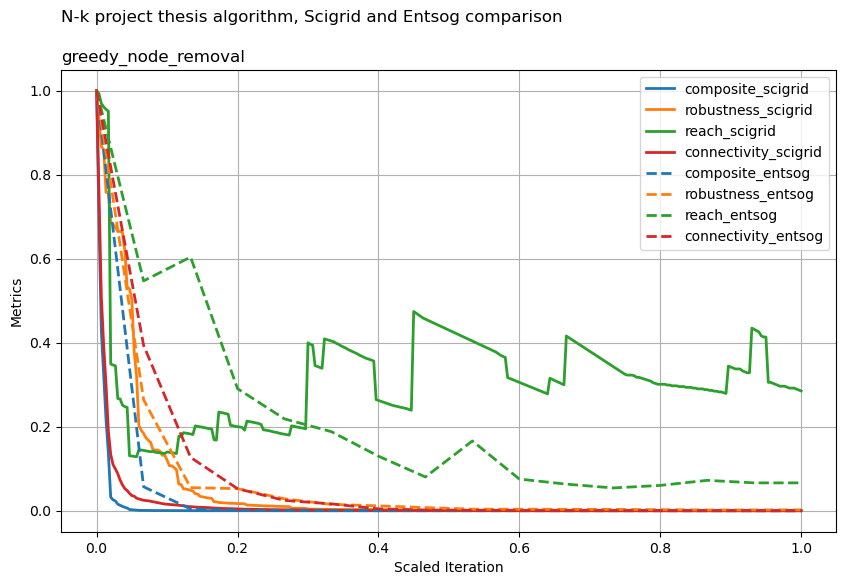

In [12]:
utils.compare_scigrid_entsog(greedy_node_removal_df)


## Specific metric

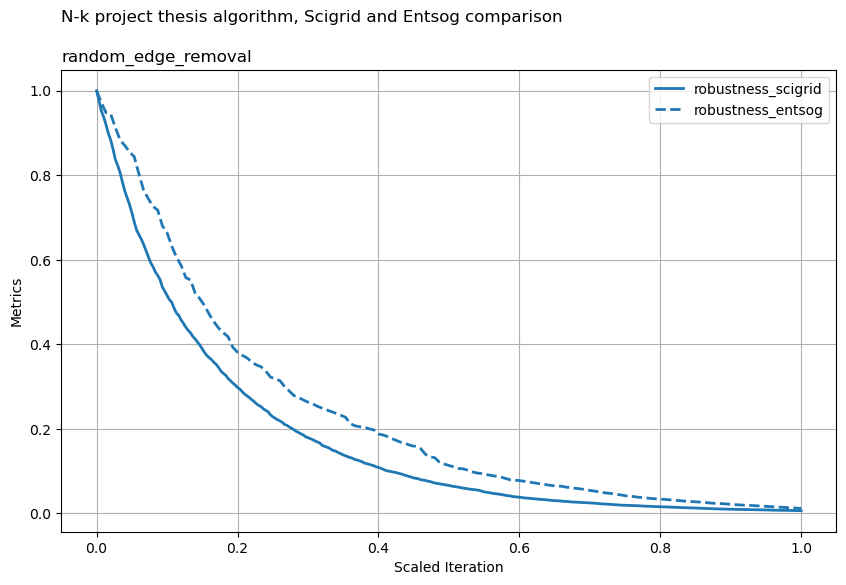

In [13]:
utils.compare_scigrid_entsog(random_edge_removal_df, 'robustness')